In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate
import time
import numpy as np

from time import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
#this next line is only needed in iPython notebooks
%matplotlib inline 
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
font = fm.FontProperties(size = 12)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def hide_spines(intx=False,inty=False):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font) 
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
           # ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
def show(nm,a=0,b=0):
    hide_spines(a,b)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    #ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    if (len(nm)>0):
        plt.savefig(nm,bbox_inches='tight');
    plt.show()
    
    
import random

%matplotlib inline

In [2]:
from scipy.stats import cauchy
from scipy.stats import norm

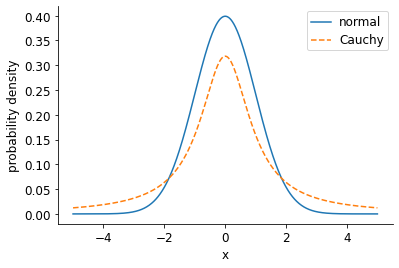

In [3]:
x = np.linspace(-5,5,1000)
plt.plot(x,norm.pdf(x),label="normal")
plt.plot(x,cauchy.pdf(x),"--",label="Cauchy")
plt.xlabel("x")
plt.ylabel("probability density")
plt.legend(loc="best")
show("cauchy")

In [4]:
print(norm.pdf(4),cauchy.pdf(4),cauchy.pdf(4)/norm.pdf(4))

0.00013383022576488537 0.01872411095198769 139.90943260368135


In [5]:
from keras.datasets import fashion_mnist
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#(x_train, y_train), (x_test, y_test) = mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


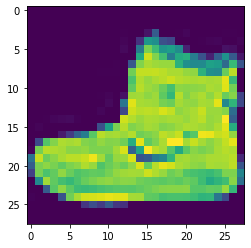

In [6]:
plt.imshow(x_train[0,:])

In [7]:
from sklearn.manifold import (TSNE)
from sklearn import datasets

In [8]:
from sklearn.model_selection import train_test_split
X=x_train.reshape((60000,28*28))
xTrain, xTest, yTrain, yTest = train_test_split(X, y_train, test_size = 0.1, random_state = 0)

In [9]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 2})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
xmake = pca.fit_transform(xTest) 

tsne= TSNE(n_components=2, init='random',perplexity=40, random_state=0,learning_rate=1200.0,n_iter=5000,n_iter_without_progress=1000)
t0 = time()
X_tsne = tsne.fit_transform(xmake)

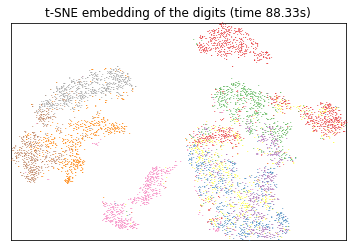

In [11]:

y = yTest.copy()
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

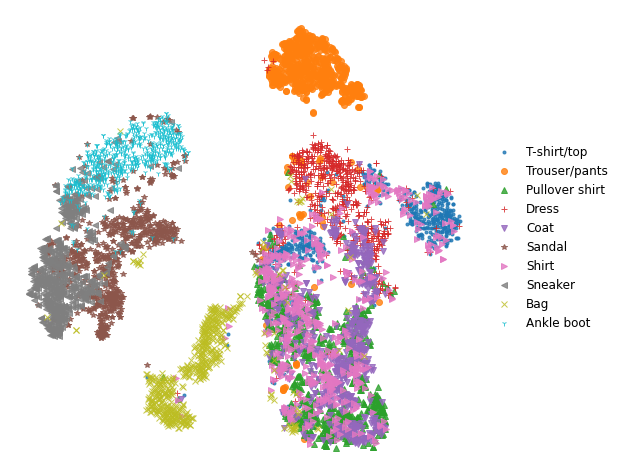

In [12]:
labels = ["T-shirt/top","Trouser/pants","Pullover shirt","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


from matplotlib import offsetbox
X = X_tsne.copy()
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)
plt.figure(figsize=(8.5,8.5))
ax = plt.subplot(111)
markers = [".","o","^","+","v","*",">","<","x","1",'s']
for i in range(10):
    plt.plot(X[yTest==i, 0], X[yTest==i, 1],markers[i], label=labels[i],alpha=0.8)
plt.xticks([]), plt.yticks([])
plt.axis("off")
leg=plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop=font)
leg.get_frame().set_linewidth(0.0)
plt.savefig("tsne_fashion.jpg", bbox_inches='tight', dpi=800)

[0 1 2 3 4 5 6 7 8 9]
0 (624, 784)
1 (580, 784)
2 (566, 784)
3 (578, 784)
4 (632, 784)
5 (597, 784)
6 (619, 784)
7 (633, 784)
8 (588, 784)
9 (583, 784)


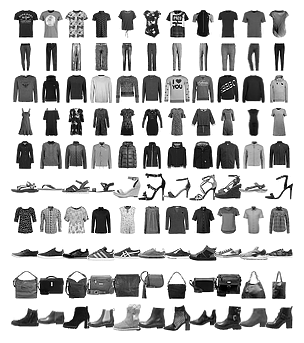

In [13]:
plt.figure(figsize=(5,6))
ax = plt.subplot(111)
ax.set_xlim(0, 5.5)
ax.set_ylim(0, 5.0)
print(np.unique(yTest))
for i in range(10):#np.max(yTest)+1):
    tmppics = xTest[yTest==9-i,:]
    print(i,tmppics.shape)
    for j in range(11):
        
        tmp=plt.cm.gray_r(X=tmppics[j,:].reshape(28,28))
        tmpfill = tmppics[j,:].reshape(28,28)
        tmp[tmpfill<5,3] = 0
        xy = [0.5*j+0.25,0.5*i+0.25]
        imagebox = matplotlib.offsetbox.AnnotationBbox(
            matplotlib.offsetbox.OffsetImage(tmp,zoom=1.0),
            xy,bboxprops =dict(edgecolor='none',alpha=0))
        ax.add_artist(imagebox)
plt.xticks([]), plt.yticks([])
plt.axis("off")
plt.savefig("fashion.jpg", bbox_inches='tight', dpi=800)

/var/folders/q4/wsmkbgh90mg310vsq5d4mnwm0000gn/T/ipykernel_10313/3551589579.py:20: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
  plt.savefig("tsne_fashion_img.jpg", bbox_inches='tight', progressive=True, dpi=800)


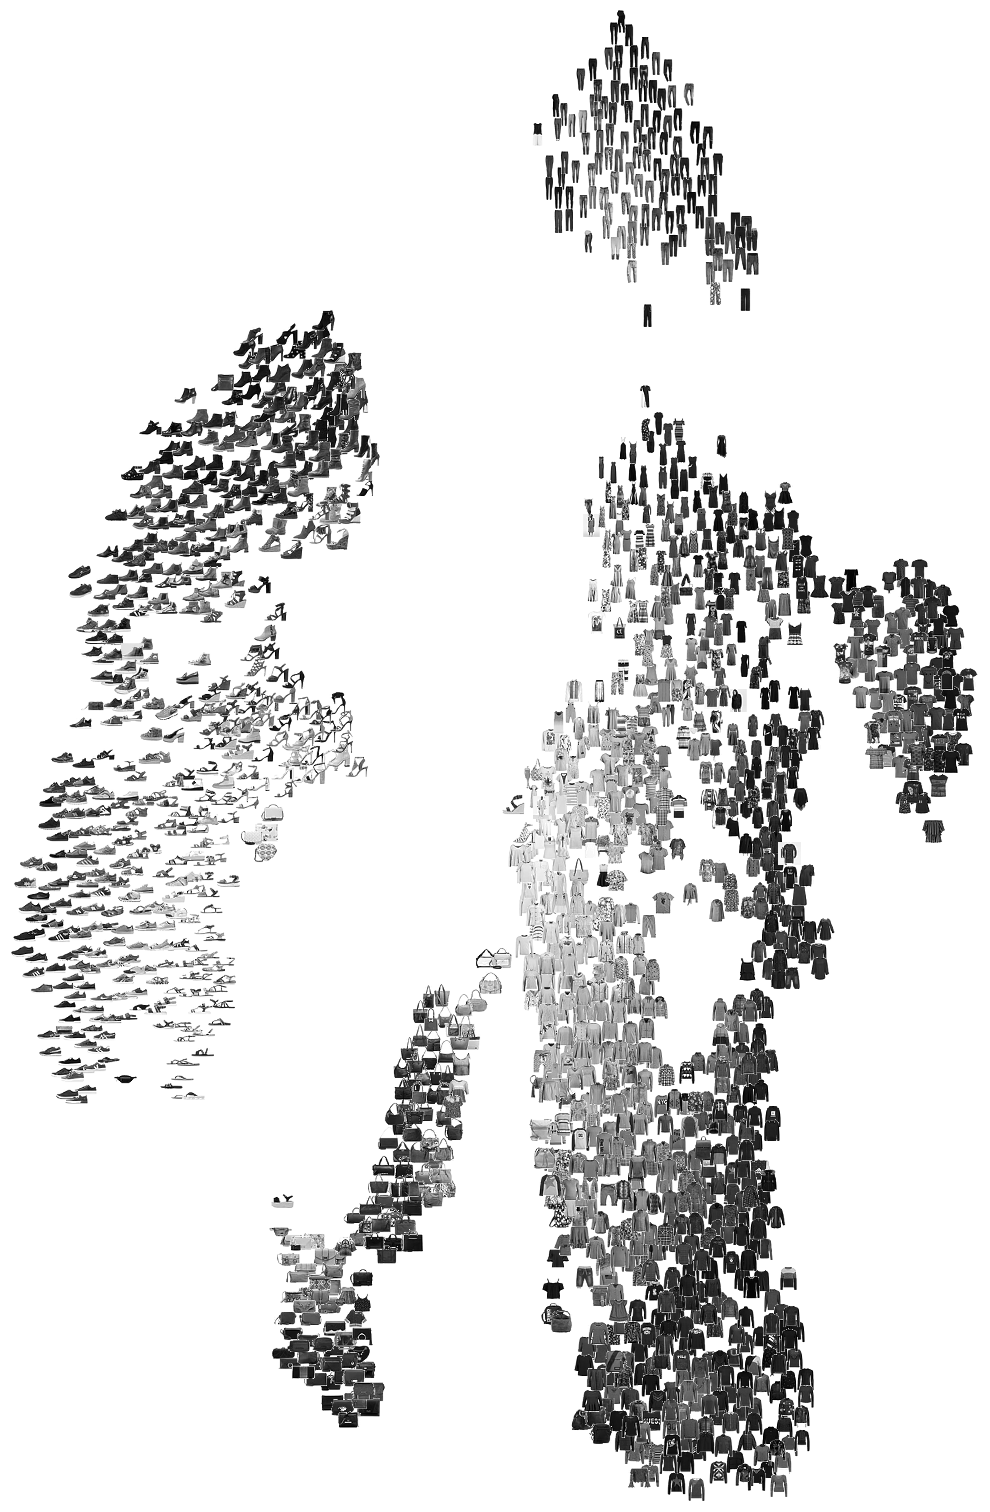

In [14]:
plt.figure(figsize=(17,27))
ax = plt.subplot(111)
shown_images = np.array([[1., 1.]])  # just something big
for i in range(X.shape[0]):
    dist = np.sum((X[i,:] - shown_images) ** 2, 1)
    if np.min(dist) < 1e-4:
        # don't show points that are too close
        continue
    shown_images = np.r_[shown_images, [X[i]]]
    tmp=plt.cm.gray_r(X=xTest[i,:].reshape(28,28))
    tmpfill = xTest[i,:].reshape(28,28)
    tmp[tmpfill<5,3] = 0
    imagebox = offsetbox.AnnotationBbox(
        offsetbox.OffsetImage(tmp,zoom=0.8),
        X[i],bboxprops =dict(edgecolor='none',alpha=0))
#offsetbox.OffsetImage(xTest[i,:].reshape(28,28), cmap=plt.cm.gray_r,zoom=0.8),
    ax.add_artist(imagebox)
plt.xticks([]), plt.yticks([])
plt.axis("off")
plt.savefig("tsne_fashion_img.jpg", bbox_inches='tight', progressive=True, dpi=800)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


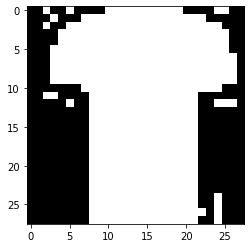

In [15]:
imgtest = np.zeros((28,28,4))
imgtest[:,:,0] = xTest[0,:].reshape(28,28)
imgtest[:,:,1] = xTest[0,:].reshape(28,28)
imgtest[:,:,2] = xTest[0,:].reshape(28,28)
imgtest[:,:,3] = 1
plt.imshow(imgtest)

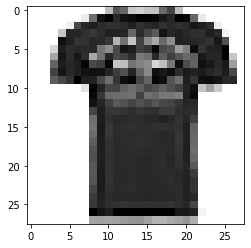

In [16]:
tmp=plt.cm.gray_r(X=xTest[0,:].reshape(28,28))
tmpfill = xTest[0,:].reshape(28,28)
tmp[tmpfill<5,3] = 0
plt.imshow(tmp)